In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
all_files = glob.glob(os.path.join("./", "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)[['docno','round_no','query_id','group','username', 'position1', 'position2', 'position3','posted_document']]

In [5]:
df[["position1","position2","position3"]] = df[["position1","position2","position3"]].astype(int)/10
df["med_score"] = df[["position1","position2","position3"]].median(axis=1)
df["mean_score"] = df[["position1","position2","position3"]].mean(axis=1)
bot_df = df[df.username.str.contains("BOT")]
bots = bot_df.username.unique()
bot_df = bot_df.sort_values(["round_no", "query_id", "group"])
bot_df

,docno,round_no,query_id,group,username,position1,position2,position3,posted_document,med_score,mean_score
112,ROUND01201AMTBOT,1,201,A,MTBOT,2.0,2.0,2.0,A Raspberry Pi is a small affordable and versa...,2.0,2.000000
113,ROUND01201AMSBOT,1,201,A,MSBOT,4.0,4.0,4.0,A Raspberry Pi is a small affordable and versa...,4.0,4.000000
120,ROUND01201BMTBOT,1,201,B,MTBOT,4.0,4.0,4.0,A Raspberry Pi is a small affordable and versa...,4.0,4.000000
121,ROUND01201BMSBOT,1,201,B,MSBOT,5.0,5.0,5.0,A Raspberry Pi is a small affordable and versa...,5.0,5.000000
108,ROUND01201CMTBOT,1,201,C,MTBOT,4.0,5.0,5.0,A Raspberry Pi is a small affordable and versa...,5.0,4.666667
...,...,...,...,...,...,...,...,...,...,...,...
2688,ROUND05296BMSBOT,5,296,B,MSBOT,5.0,5.0,5.0,Are you looking for information on how to prop...,5.0,5.000000
2672,ROUND05296CMABOT,5,296,C,MABOT,4.0,3.0,3.0,Recycling lead acid batteries is not only impo...,3.0,3.333333
2673,ROUND05296CMSBOT,5,296,C,MSBOT,5.0,2.0,5.0,Are you looking for the best way to dispose of...,5.0,4.000000
2682,ROUND05296DMABOT,5,296,D,MABOT,4.0,3.0,3.0,Recycling lead acid batteries including old ca...,3.0,3.333333


In [9]:
# for b in bots:
#     user_df = bot_df[bot_df.username == b]
#     facetgrid_obj = sns.relplot(data = user_df, x="round_no", y="med_score", col="group" ,hue="query_id", kind = "line", palette = sns.color_palette())
#     facetgrid_obj.fig.suptitle(f"{b}")
#     facetgrid_obj.figure.subplots_adjust(top=0.8)
#     plt.show()

In [10]:
# for b in bots:
#     user_df = bot_df[bot_df.username == b]
#     facetgrid_obj = sns.relplot(data = user_df, x="round_no", y="mean_score", col="group" ,hue="query_id", kind = "line", palette = sns.color_palette())
#     facetgrid_obj.fig.suptitle(f"{b}")
#     facetgrid_obj.figure.subplots_adjust(top=0.8)
#     plt.show()

In [11]:
def specs(x, **kwargs):
    ax = sns.histplot(x=x)
    ax.axvline(x.mean(), color='k', lw=2)
    ax.axvline(x.median(), color='k', ls='--', lw=2)

## median ranks
#### * line: mean, dashes: median

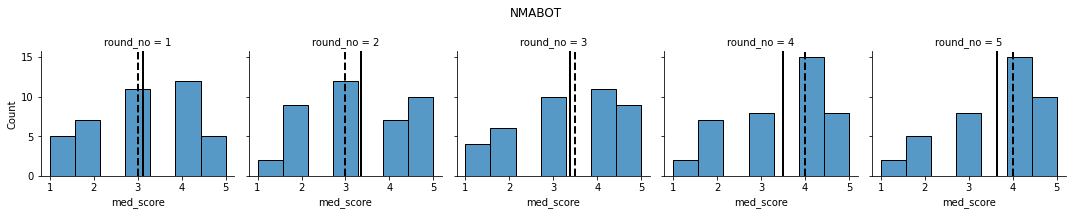

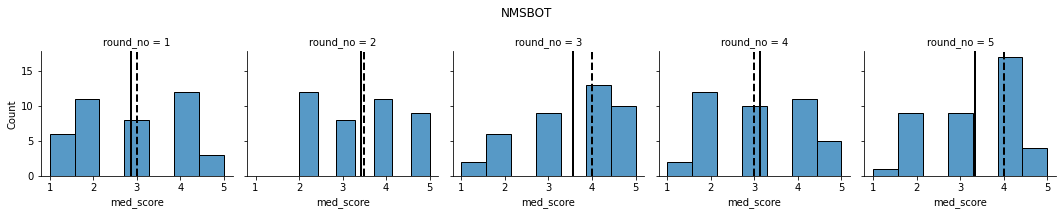

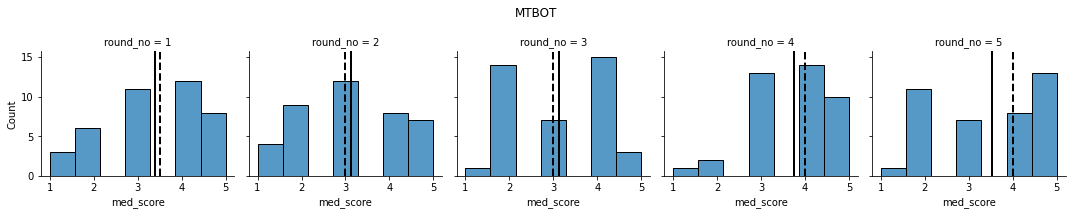

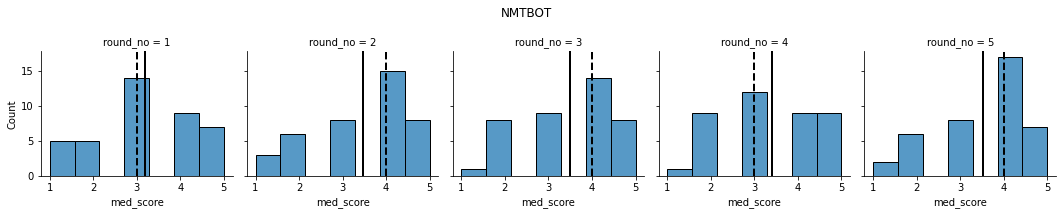

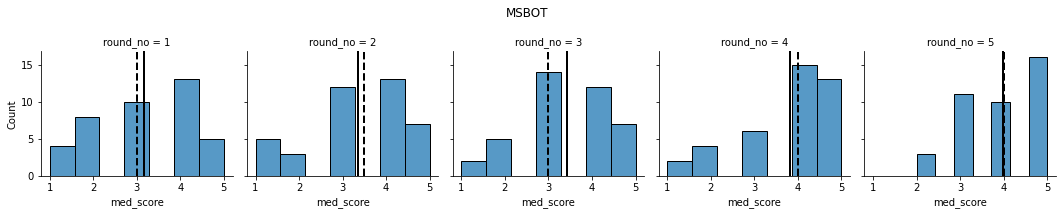

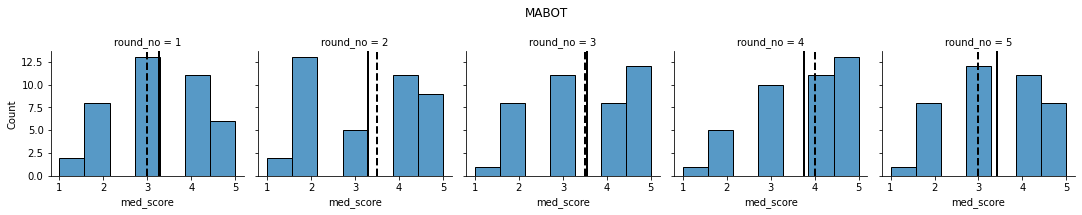

In [12]:
for b in bots:
    user_df = bot_df[bot_df.username == b]
    # facetgrid_obj = sns.displot(data = user_df,bins=5, x="med_score", col="round_no", kind = "hist", palette = sns.color_palette())
    # facetgrid_obj.fig.suptitle(f"{b}")
    # facetgrid_obj.figure.subplots_adjust(top=0.8)
    g = sns.FacetGrid(data=user_df, col='round_no')
    g.fig.suptitle(f"{b}")
    g.map(specs,'med_score' )
    plt.show()

## mean ranks
#### * line: mean, dashes: median

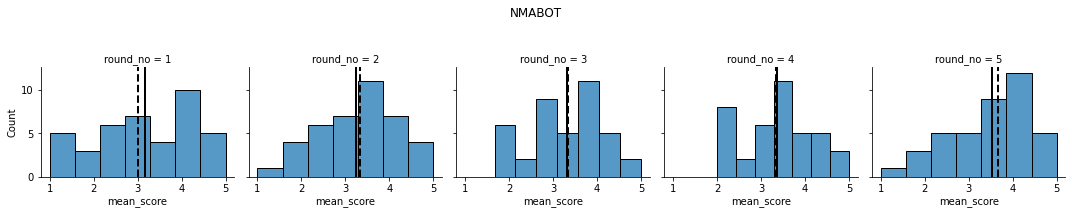

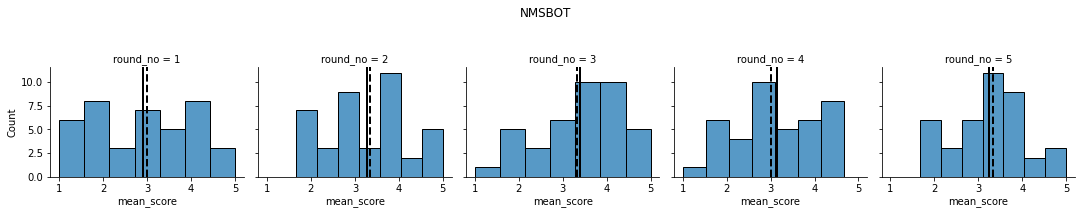

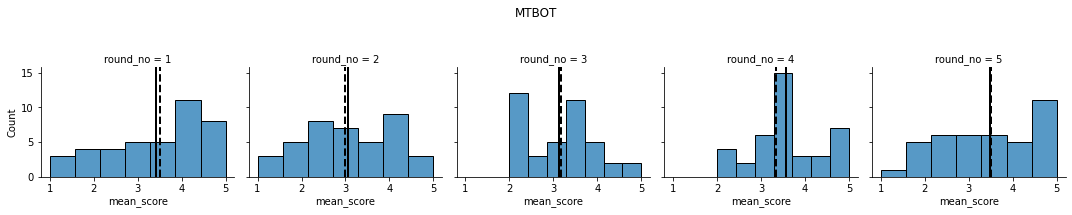

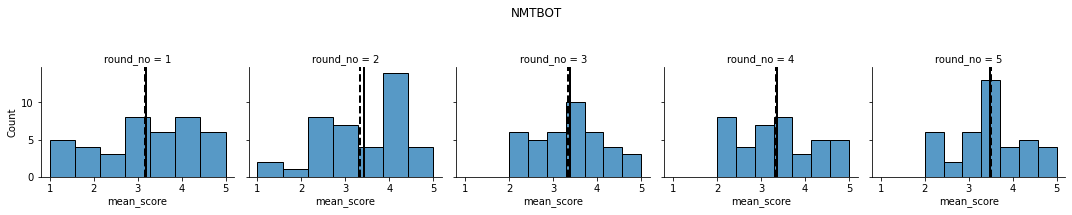

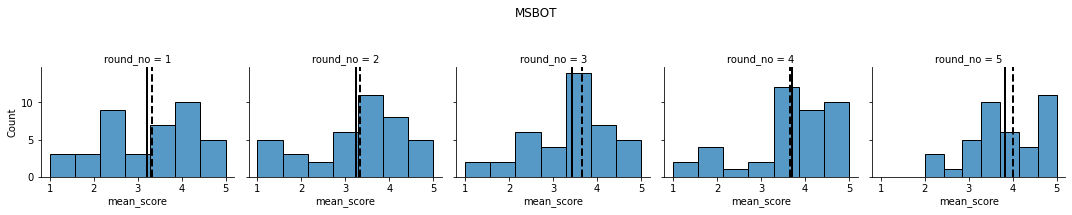

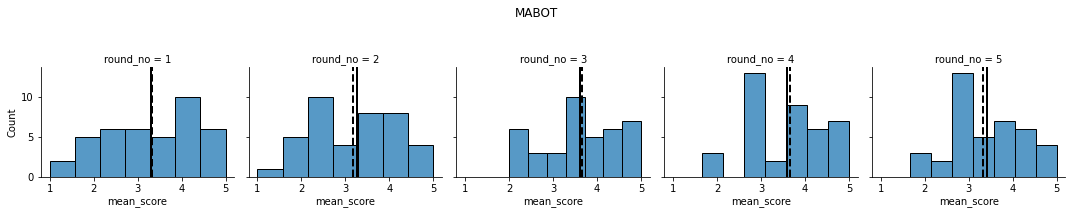

In [20]:
for b in bots:
    user_df = bot_df[bot_df.username == b]
    # facetgrid_obj = sns.displot(data = user_df,bins=10, x="mean_score", col="round_no", kind = "hist", palette = sns.color_palette())
    # facetgrid_obj.fig.suptitle(f"{b}")
    g = sns.FacetGrid(data=user_df, col='round_no')
    g.map(specs,'mean_score')
    g.figure.subplots_adjust(top=0.7)
    g.fig.suptitle(f"{b}")
    plt.show()

In [14]:
!jupyter nbconvert bot_analysis.ipynb --to html --no-input 

[NbConvertApp] Converting notebook bot_analysis.ipynb to html
[NbConvertApp] Writing 708280 bytes to bot_analysis.html


2.875 3.975


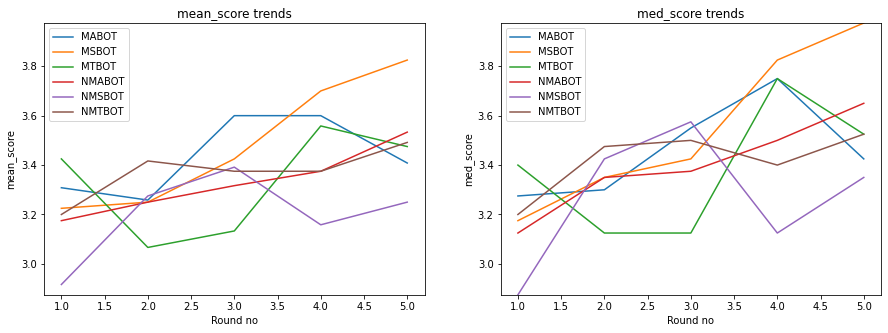

In [80]:
df = bot_df.groupby(["username", "round_no"]).mean().reset_index()
fig, ax = plt.subplots(1,2,figsize=(15, 5))

# Group the data by 'username'
grouped = df.groupby('username')

# Iterate over each group and plot the lines
vals = df.mean_score.to_list() + df.med_score.to_list()
min_, max_ = min(vals), max(vals)
print(min_,max_)

for i in [0,1]:
    col = "mean_score" if i == 0 else "med_score"
    for name, group in grouped:
        ax[i].plot(group['round_no'], group[col], label=name)

    ax[i].set_ylim(min_, max_)
    ax[i].set_xlabel(f'Round no')
    ax[i].set_ylabel(f'{col}')
    ax[i].set_title(f'{col} trends')
    ax[i].legend()

plt.show()